<a href="https://colab.research.google.com/github/V3ct4r31/TelecomX_challenge1/blob/main/TELECOMX_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X**
##**"CHURN DE CLIENTES"**
###**Introducción**
La empresa Telecom X es una empresa de telecomunicaciones que está enfrentando un alto índice de evasión de clientes (alta tasa de cancelaciones) y aún no han identificado el problema de esta pérdida de clientes. Por esta razón, deciden iniciar un proyecto específico de Churn de clientes. Para ello, se nos ha proporcionado datos de la empresa para realizar el análisis exploratorio de ellos para posteriormente entregarlos al equipo de ciencia de datos, quienes realizarán el análisis predictivo que determinará que factores contribuyen a esta evasión de clientes.

##**Exploración de datos Telecom X**

In [11]:
import pandas as pd
import numpy as np

datos = pd.read_json('/content/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [13]:
datos.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [14]:
datos.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

##**Limpieza y transformación de datos**

In [15]:
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

df_expanded = pd.concat([
    datos[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [16]:
df_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [17]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## **Inspección de variables categóricas**

In [18]:
# Columnas a inspeccionar
columnas_a_revisar = ['Churn','customerID','OnlineSecurity', 'MultipleLines', 'gender', 'Partner', 'Contract',
                      'Dependents','PhoneService','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                      'PaymentMethod','InternetService']

print("Valores únicos en las columnas seleccionadas:")
for col in columnas_a_revisar:
    print(f"\n--- Columna: {col} ---")
    print(df_expanded[col].unique())

Valores únicos en las columnas seleccionadas:

--- Columna: Churn ---
['No' 'Yes' '']

--- Columna: customerID ---
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

--- Columna: OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- Columna: MultipleLines ---
['No' 'Yes' 'No phone service']

--- Columna: gender ---
['Female' 'Male']

--- Columna: Partner ---
['Yes' 'No']

--- Columna: Contract ---
['One year' 'Month-to-month' 'Two year']

--- Columna: Dependents ---
['Yes' 'No']

--- Columna: PhoneService ---
['Yes' 'No']

--- Columna: OnlineBackup ---
['Yes' 'No' 'No internet service']

--- Columna: DeviceProtection ---
['No' 'Yes' 'No internet service']

--- Columna: TechSupport ---
['Yes' 'No' 'No internet service']

--- Columna: StreamingTV ---
['Yes' 'No' 'No internet service']

--- Columna: StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Columna: PaperlessBilling ---
['Yes' 'No']

--- Columna: PaymentMethod ---
['Mailed check' '

In [19]:
# Columnas a inspeccionar
columnas_a_revisar = ['Churn','customerID','OnlineSecurity', 'MultipleLines', 'gender', 'Partner', 'Contract',
                      'Dependents','PhoneService','OnlineBackup','DeviceProtection',
                      'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                      'PaymentMethod','InternetService']

print("Frecuencia de valores en las columnas seleccionadas:")
for col in columnas_a_revisar:
    print(f"\n--- Columna: {col} ---")
    print(df_expanded[col].value_counts())

Frecuencia de valores en las columnas seleccionadas:

--- Columna: Churn ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- Columna: customerID ---
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

--- Columna: OnlineSecurity ---
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

--- Columna: MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

--- Columna: gender ---
gender
Male      3675
Female    3592
Name: count, dtype: int64

--- Columna: Partner ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64

--- Columna: Contract ---
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtyp

## **Inspección de variables numéricas**

In [20]:
df_expanded[['Charges.Total', 'Charges.Monthly']].describe()

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [21]:
df_expanded['Charges.Total'].apply(lambda x: type(x))

,Charges.Total
0,<class 'str'>
1,<class 'str'>
2,<class 'str'>
3,<class 'str'>
4,<class 'str'>
...,...
7262,<class 'str'>
7263,<class 'str'>
7264,<class 'str'>
7265,<class 'str'>


In [22]:
df_expanded['Charges.Total'].apply(lambda x: isinstance(x, str)).sum()

np.int64(7267)

In [23]:
# Crea una lista de los valores únicos de la columna
valores_totales = df_expanded['Charges.Total'].unique()

# Itera sobre los valores y muestra los que no son numéricos
valores_no_numericos = []
for valor in valores_totales:
    try:
        float(valor)  # Intenta convertir el valor a un número
    except ValueError:
        valores_no_numericos.append(valor) # Si no puede, lo agrega a la lista

print("Valores no numéricos encontrados en 'Charges.Total':")
print(valores_no_numericos)

# Opcional: mostrar la cantidad de filas que tienen esos valores
print("\nConteo de cada valor no numérico:")
for valor in valores_no_numericos:
    print(f"'{valor}': {df_expanded[df_expanded['Charges.Total'] == valor].shape[0]} filas")

Valores no numéricos encontrados en 'Charges.Total':
[' ']

Conteo de cada valor no numérico:
' ': 11 filas


In [24]:
print(df_expanded['Charges.Total'].unique())
print(df_expanded['Charges.Total'].nunique())
print(df_expanded['Charges.Total'].dtypes)

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
6531
object


In [25]:
# Filtrar valores que no se pueden convertir a número
valores_unicos = df_expanded['Charges.Total'].unique()

# Mostrar valores que NO son convertibles a número (excluyendo ya los números)
valores_no_numericos = [v for v in valores_unicos if pd.to_numeric(v, errors='coerce') != pd.to_numeric(v, errors='coerce')]

# Mostrar resultados
print("Valores no numéricos encontrados:")
print(valores_no_numericos)
print(f"Total: {len(valores_no_numericos)} valores únicos no numéricos")


Valores no numéricos encontrados:
[' ']
Total: 1 valores únicos no numéricos


In [26]:
print("Total de filas:", df_expanded.shape[0])
print("Valores nulos:", df_expanded['Charges.Total'].isna().sum())

Total de filas: 7267
Valores nulos: 0


In [27]:
print(df_expanded['Charges.Total'].value_counts(dropna=False))

Charges.Total
20.2       11
           11
19.75       9
19.55       9
19.9        9
           ..
1993.2      1
72.1        1
1237.85     1
542.4       1
593.3       1
Name: count, Length: 6531, dtype: int64


In [28]:
print(df_expanded['Charges.Total'].describe())

count     7267
unique    6531
top       20.2
freq        11
Name: Charges.Total, dtype: object


In [29]:
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')

In [30]:
print(df_expanded['Charges.Total'].dtype)  # Debe decir float64
print(df_expanded['Charges.Total'].describe())  # Ahora mostrará mean, std, min, etc.

float64
count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: Charges.Total, dtype: float64


In [31]:
print("Cantidad de valores NaN en Charges.Total:", df_expanded['Charges.Total'].isna().sum())

Cantidad de valores NaN en Charges.Total: 11


In [32]:
df_expanded['Charges.Total'] = df_expanded['Charges.Total'].fillna(0)

In [33]:
print("Valores NaN después del reemplazo:", df_expanded['Charges.Total'].isna().sum())

Valores NaN después del reemplazo: 0


In [34]:
print(df_expanded['Charges.Total'].describe())  # Ahora mostrará mean, std, min, etc.

count    7267.000000
mean     2277.182035
std      2268.648587
min         0.000000
25%       396.200000
50%      1389.200000
75%      3778.525000
max      8684.800000
Name: Charges.Total, dtype: float64


In [35]:
# Ver columnas que aún son categóricas (tipo object)
columnas_categoricas_restantes = df_expanded.select_dtypes(include='object').columns
print("Columnas categóricas restantes:", columnas_categoricas_restantes.tolist())

Columnas categóricas restantes: ['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [36]:
columnas_sin_variabilidad = [col for col in df_expanded.columns if df_expanded[col].nunique() == 1]
print("Columnas sin variabilidad:", columnas_sin_variabilidad)

Columnas sin variabilidad: []


In [37]:
# 2. Limpieza de la columna 'Churn'
df_expanded['Churn'] = df_expanded['Churn'].replace('', 'No')
df_expanded['Churn'] = df_expanded['Churn'].map({'Yes': 1, 'No': 0})

# 3. Mapeo de columnas de servicio de internet y teléfono
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    df_expanded[col] = df_expanded[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

df_expanded['MultipleLines'] = df_expanded['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# 4. Mapeo de otras columnas binarias (gender, Partner, etc.)
mapeo_binario = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}
columnas_a_mapear = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in columnas_a_mapear:
    df_expanded[col] = df_expanded[col].map(mapeo_binario)

# 5. Mapeo de columnas categóricas con múltiples valores
mapeo_contrato = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df_expanded['Contract'] = df_expanded['Contract'].map(mapeo_contrato)

mapeo_internet = {'Fiber optic': 0, 'DSL': 1, 'No': 2}
df_expanded['InternetService'] = df_expanded['InternetService'].map(mapeo_internet)

mapeo_pago = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}
df_expanded['PaymentMethod'] = df_expanded['PaymentMethod'].map(mapeo_pago)

# 6. Limpieza de las columnas de cargos
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')
df_expanded['Charges.Total'] = df_expanded['Charges.Total'].fillna(0)

# 7. Finalmente, verifica el resultado
df_expanded.head()
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


In [38]:
df_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,...,1,0,1,1,0,1,1,1,65.6,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,...,0,0,0,0,1,0,0,1,59.9,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,0,1,0,0,0,0,1,0,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,1,1,0,1,1,0,1,0,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,0,0,1,1,0,0,1,1,83.9,267.40


## **Columna de cuentas diarias**

In [39]:
# Crear columna Cuentas_Diarias dividiendo entre 30 días
df_expanded['Cuentas_Diarias'] = df_expanded['Charges.Monthly'] / 30

df_expanded[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


## **Revisión de la transformación y estandarización de datos del Dataframe**

In [40]:
# 1. Revisar tipos de datos por columna
print(df_expanded.dtypes)

customerID           object
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
Charges.Monthly     float64
Charges.Total       float64
Cuentas_Diarias     float64
dtype: object


In [41]:
# 2. Revisar valores únicos por columna categórica para detectar valores extraños
cols_categoricas = ['Churn','customerID','OnlineSecurity', 'MultipleLines', 'gender', 'Partner', 'Contract',
                    'Dependents','PhoneService','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling',
                    'PaymentMethod','InternetService']

for col in cols_categoricas:
    print(f"{col}: {df_expanded[col].unique()}")

Churn: [0 1]
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
OnlineSecurity: [0 1]
MultipleLines: [0 1]
gender: [0 1]
Partner: [1 0]
Contract: [1 0 2]
Dependents: [1 0]
PhoneService: [1 0]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: [1 0 3 2]
InternetService: [1 0 2]


In [42]:
df_expanded.info()  # Para ver tipos de datos y nulos
df_expanded.nunique()  # Para ver cantidad de valores únicos
df_expanded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   int64  
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   int64  


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,...,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.777487,0.285950,...,0.342782,0.289528,0.383927,0.387505,0.688730,0.593230,1.313747,64.720098,2277.182035,2.157337
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.779873,0.451897,...,0.474672,0.453575,0.486374,0.487214,0.833174,0.491265,1.148885,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [43]:
df_expanded.to_csv("datos_tratados.csv", index=False)

# **Análisis descriptivo**
Se realizó un análisis estadístico descriptivo de las columnas numéricas del conjunto de datos. Las métricas calculadas incluyen:

Media
Mediana (50%)

Desviación estándar

Mínimo y máximo

Cuartiles (25% y 75%)

Esto permite comprender la distribución de los valores y detectar posibles sesgos, valores atípicos o patrones en variables como tenure, Charges.Monthly, Charges.Total, y otras relacionadas al comportamiento del cliente.

El análisis se realizó utilizando la función df.describe(), y servirá como base para entender las diferencias entre clientes que permanecen y los que hacen "churn".

In [44]:
# Revisar estadísticas básicas para las columnas numéricas
print(df_expanded.describe())

             Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7267.000000  7267.000000    7267.000000  7267.000000  7267.000000   
mean      0.257190     0.505711       0.162653     0.484106     0.300124   
std       0.437115     0.500002       0.369074     0.499782     0.458343   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     1.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7267.000000   7267.000000    7267.000000      7267.000000   
mean     32.346498      0.902711       0.421770         0.777487   
std      24.571773      0.296371       0.493876         0.779873   
min       0.000000      0.000000       0.00

In [45]:
# Ver los primeros registros para chequeo visual rápido
print(df_expanded.head())

   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO      0       0              0        1           1       9   
1  0003-MKNFE      0       1              0        0           0       9   
2  0004-TLHLJ      1       1              0        0           0       4   
3  0011-IGKFF      1       1              1        1           0      13   
4  0013-EXCHZ      1       0              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  DeviceProtection  \
0             1              0                1  ...                 0   
1             1              1                1  ...                 0   
2             1              0                0  ...                 1   
3             1              0                0  ...                 1   
4             1              0                0  ...                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            1        

# **Cargas y análisis**

In [46]:
df_expanded.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

# **1.Distribución de evasión**

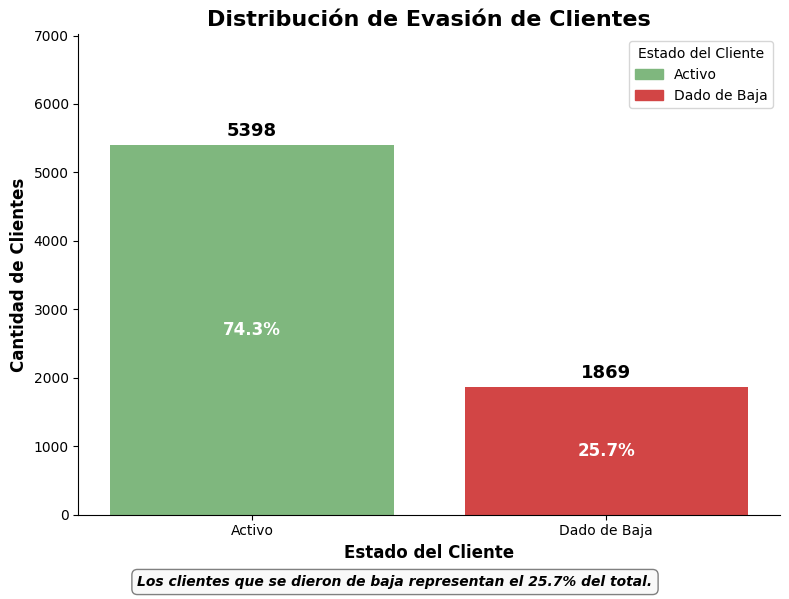

In [47]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Conteo de valores en 'Churn' ordenado por índice (0 → activo, 1 → dado de baja)
conteo = df_expanded['Churn'].value_counts().sort_index()
total_clientes = conteo.sum()
porcentajes = conteo / total_clientes * 100

# Mapeo de etiquetas para mostrar texto en lugar de números
mapeo_etiquetas = {0: 'Activo', 1: 'Dado de Baja'}
etiquetas = [mapeo_etiquetas[i] for i in conteo.index]

# Colores: verde y rojo
colores = ['#7FB77E', '#D24545']

# Configuración general
plt.rcParams.update({'font.family': 'sans-serif'})

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(etiquetas, conteo.values, color=colores, width=0.8)

# Título y etiquetas de ejes
ax.set_title('Distribución de Evasión de Clientes', fontsize=16, weight='bold')
ax.set_xlabel('Estado del Cliente', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Agregar número y porcentaje a cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()

    # Número encima
    ax.text(bar.get_x() + bar.get_width()/2, height + total_clientes * 0.01,
            f"{int(height)}", ha='center', va='bottom',
            fontsize=13, weight='bold', color='black')

    # Porcentaje dentro
    ax.text(bar.get_x() + bar.get_width()/2, height * 0.5,
            f"{porcentajes[i]:.1f}%", ha='center', va='center',
            fontsize=12, weight='bold', color='white')

# Leyenda
leyenda = [Patch(color=colores[0], label='Activo'),
           Patch(color=colores[1], label='Dado de Baja')]
ax.legend(handles=leyenda, title='Estado del Cliente', loc='upper right')

# Comentario inferior centrado
comentario = f"Los clientes que se dieron de baja representan el {porcentajes[1]:.1f}% del total."
fig.text(0.5, 0.01, comentario,
         ha='center', va='bottom',
         fontsize=10, style='italic', weight='bold',
         bbox=dict(boxstyle="round,pad=0.4", fc="#f9f9f9", ec="gray"))

# Estética del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.set_ylim(0, max(conteo.values) * 1.3)

# Ajustar el diseño
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('Distribucion_evasion_clientes.png', transparent=False)
plt.show()


# **2.Recuento de evasión por variables categóricas**


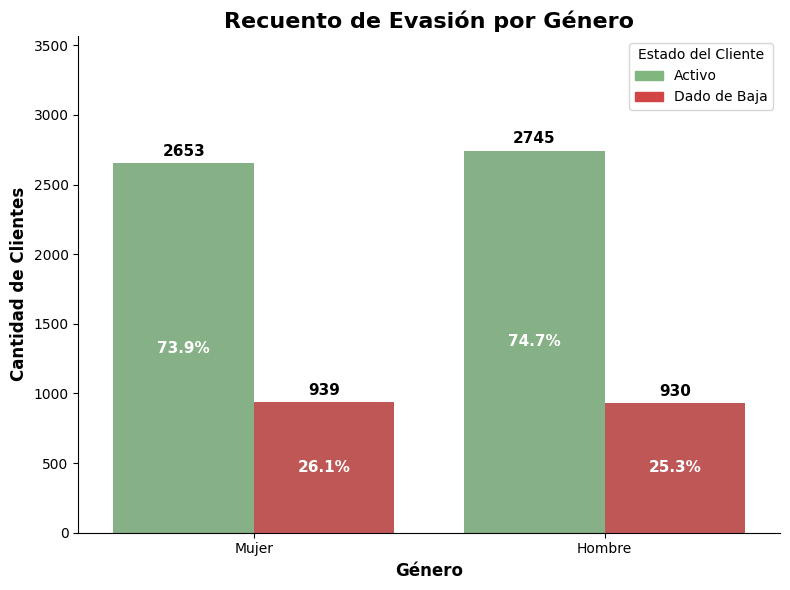

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Suponiendo que ya tienes 'df_expanded' con las columnas necesarias

# Mapeo de etiquetas legibles para Churn y gender
df_expanded['Genero_Label'] = df_expanded['gender'].replace({0: 'Mujer', 1: 'Hombre'})
df_expanded['Churn_Label'] = df_expanded['Churn'].replace({0: 'Activo', 1: 'Dado de Baja'})

# Colores personalizados
colores = ['#7FB77E', '#D24545']  # Verde oliva, rojo vino

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Crear gráfico de barras apiladas con seaborn countplot
sns.countplot(data=df_expanded, x='Genero_Label', hue='Churn_Label', palette=colores, ax=ax)

# Título y etiquetas
ax.set_title('Recuento de Evasión por Género', fontsize=16, weight='bold')
ax.set_xlabel('Género', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Obtener totales por género (sin hue)
total_por_genero = df_expanded.groupby('Genero_Label').size()

# Mostrar etiquetas con números y porcentajes
for bar in ax.patches:
    height = bar.get_height()
    if height == 0:
        continue

    # Posición x central de la barra
    x = bar.get_x() + bar.get_width() / 2

    # Obtener etiqueta de género para la barra actual (Mujer o Hombre)
    # Usamos la posición x para determinar la categoría (considerando que las barras se dibujan en orden)
    # Hay 2 barras por grupo, entonces índice de grupo = int(x // bar.get_width() // 2)
    # Pero para simplificar, usamos el eje x para obtener el orden de las categorías:
    categorias_ordenadas = ax.get_xticklabels()
    # Bar index = posición del centro / ancho barra
    bar_index = int(round(bar.get_x() / bar.get_width() / 2))
    label_genero = categorias_ordenadas[bar_index].get_text()

    # Total de la categoría para porcentaje
    total = total_por_genero[label_genero]

    porcentaje = height / total * 100

    # Número encima de la barra
    ax.text(x, height + 30, f'{int(height)}', ha='center', va='bottom', fontsize=11, weight='bold')

    # Porcentaje dentro de la barra (si hay espacio)
    if porcentaje > 1 and height > 20:
        ax.text(x, height * 0.5, f'{porcentaje:.1f}%', ha='center', va='center', fontsize=11,
                weight='bold', color='white')

# Leyenda personalizada
handles = [Patch(color=colores[0], label='Activo'),
           Patch(color=colores[1], label='Dado de Baja')]
ax.legend(handles=handles, title='Estado del Cliente', loc='upper right')

# Quitar líneas superior y derecha del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Quitar grid si lo prefieres
ax.grid(False)

# Ajustar límite y espacio en y para que no corten etiquetas
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.3)

plt.tight_layout()
plt.savefig('Recuento_evasion_genero.png', transparent=False)
plt.show()

In [49]:
pd.crosstab(df_expanded['Genero_Label'], df_expanded['Churn_Label'])

Churn_Label,Activo,Dado de Baja
Genero_Label,,
Hombre,2745,930
Mujer,2653,939


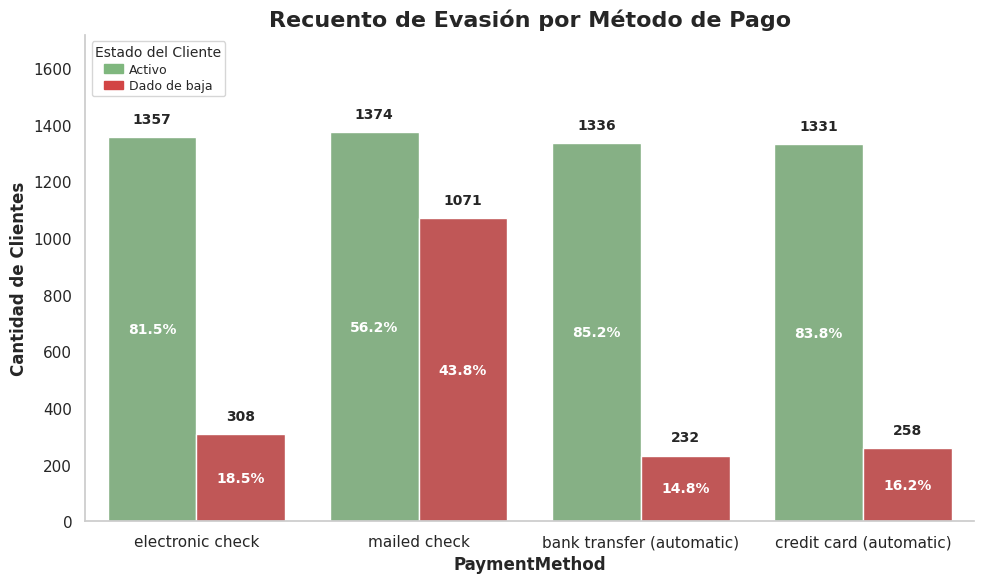

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Mapear nombres de métodos de pago y etiquetas legibles
df_expanded['PaymentMethod'] = df_expanded['PaymentMethod'].replace({
    0: 'mailed check',
    1: 'electronic check',
    2: 'credit card (automatic)',
    3: 'bank transfer (automatic)'
})

df_expanded['Churn_Label'] = df_expanded['Churn'].replace({0: 'Activo', 1: 'Dado de baja'})

# Colores personalizados
colores = ['#7FB77E', '#D24545']

# Crear gráfico y asegurar orden correcto de categorías en el hue
fig, ax = plt.subplots(figsize=(10, 6))
order_estado = ['Activo', 'Dado de baja']
ax = sns.countplot(data=df_expanded, x='PaymentMethod', hue='Churn_Label', palette=colores, hue_order=order_estado)

# Títulos y etiquetas
ax.set_title('Recuento de Evasión por Método de Pago', fontsize=16, weight='bold')
ax.set_xlabel('PaymentMethod', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Eliminar bordes y grilla
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Totales por categoría
totales = df_expanded.groupby('PaymentMethod').size()

# Anotar valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue

    x = p.get_x() + p.get_width() / 2
    # Obtener etiquetas reales desde ticks
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
    idx = int(round(p.get_x() + p.get_width() / 2))
    if idx < len(x_labels):
        categoria = x_labels[idx]
    else:
        continue

    total = totales.get(categoria, 1)
    porcentaje = height / total * 100

    # Cantidad (arriba)
    ax.annotate(f'{int(height)}',
                (x, height + 40),
                ha='center', va='bottom',
                fontsize=10, weight='bold')

    # Porcentaje (dentro)
    ax.annotate(f'{porcentaje:.1f}%',
                (x, height * 0.5),
                ha='center', va='center',
                fontsize=10, weight='bold', color='white')

# Leyenda dentro del gráfico con tamaño reducido
handles = [Patch(color=colores[0], label='Activo'),
           Patch(color=colores[1], label='Dado de baja')]
legend = ax.legend(handles=handles,
                   title='Estado del Cliente',
                   title_fontsize=10,       # Tamaño del título
                   fontsize=9,              # Tamaño del texto de la leyenda
                   loc='upper left',
                   frameon=True,
                   borderpad=0.3,           # Padding interno
                   labelspacing=0.3,        # Espacio entre líneas
                   handlelength=1.5,        # Largo del ícono de color
                   handletextpad=0.5)       # Espacio entre ícono y texto

# Limitar eje y
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.25)
plt.tight_layout()

plt.savefig('Distribucion_evasion_metodo_pago.png', transparent=False)
plt.show()


In [51]:
pd.crosstab(df_expanded['PaymentMethod'], df_expanded['Churn_Label'])

Churn_Label,Activo,Dado de baja
PaymentMethod,,
bank transfer (automatic),1336,232
credit card (automatic),1331,258
electronic check,1357,308
mailed check,1374,1071


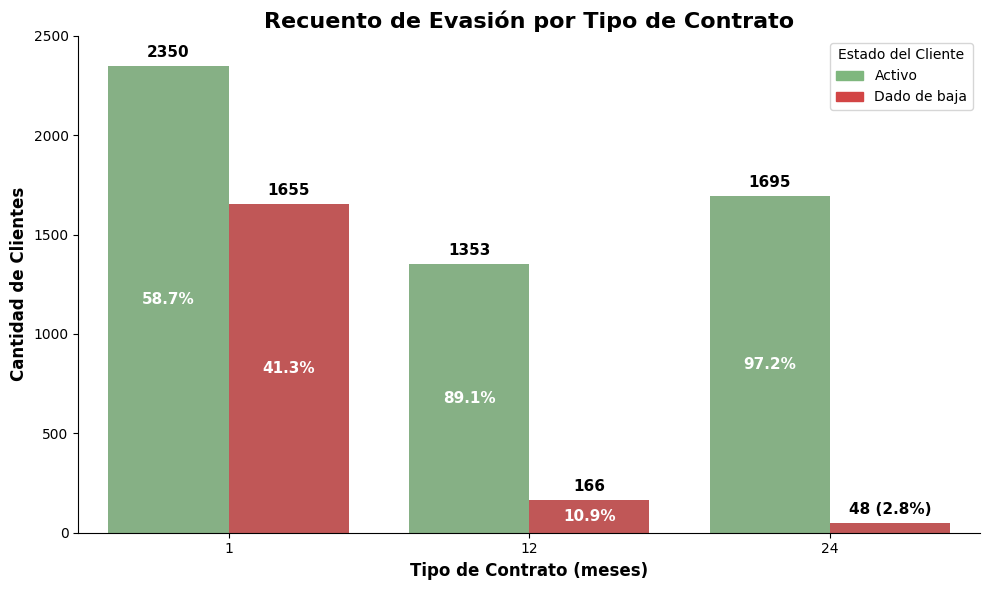

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import pandas as pd
import matplotlib.colors as mcolors

# Datos originales
data = {
    'Contract': [1, 1, 12, 12, 24, 24],
    'Churn_Label': ['Activo', 'Dado de baja', 'Activo', 'Dado de baja', 'Activo', 'Dado de baja'],
    'Cantidad': [2350, 1655, 1353, 166, 1695, 48],
    'Total':[4005,4005,1519,1519,1743,1743]
}

df_grafico = pd.DataFrame(data)

# El cálculo del porcentaje
df_grafico['Porcentaje'] = (df_grafico['Cantidad'] * 100) / df_grafico['Total']

# Colores personalizados
colores = ['#7FB77E', '#D24545']

# Crear figura y gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(data=df_grafico, x='Contract', y='Cantidad', hue='Churn_Label', palette=colores, ax=ax)

# Títulos y etiquetas
ax.set_title('Recuento de Evasión por Tipo de Contrato', fontsize=16, weight='bold')
ax.set_xlabel('Tipo de Contrato (meses)', fontsize=12, weight='bold')
ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')

# Quitar bordes y grilla
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Calcular totales por contrato
totales_por_contrato = df_grafico.groupby('Contract')['Cantidad'].sum()

# Mostrar valores y porcentajes
for p in ax.patches:
    height = p.get_height()
    x_pos = p.get_x() + p.get_width() / 2.0

    # Obtener el contrato y el estado del cliente de la barra
    contrato = int(df_grafico['Contract'].unique()[int(p.get_x() + 0.5)])

    # Asignar estado del cliente basado en el color para simular la leyenda
    if p.get_facecolor() == tuple(c / 255 for c in (127, 183, 126, 255)): # Color verde
        estado_cliente = 'Activo'
    else: # Color rojo
        estado_cliente = 'Dado de baja'

    total = totales_por_contrato[contrato]
    porcentaje = (height / total) * 100

    # Lógica de anotación para todas las barras
    if height > 0:
        if int(height) == 48:
            # Para la barra de 48, colocar el número y porcentaje encima
            ax.annotate(f'{int(height)} ({porcentaje:.1f}%)',
                        (x_pos, height + 30),
                        ha='center', va='bottom', fontsize=11, weight='bold')
        else:
            # Para las demás barras, colocar el número encima
            ax.annotate(f'{int(height)}',
                        (x_pos, height + 30),
                        ha='center', va='bottom', fontsize=11, weight='bold')

            # Y el porcentaje dentro si la barra es lo suficientemente alta
            if porcentaje > 1 and height > 20:
                ax.annotate(f'{porcentaje:.1f}%',
                            (x_pos, height * 0.5),
                            ha='center', va='center', fontsize=11, weight='bold', color='white')

# Leyenda personalizada
handles = [Patch(color=colores[0], label='Activo'),
           Patch(color=colores[1], label='Dado de baja')]
ax.legend(handles=handles, title='Estado del Cliente', loc='upper right')

# Ajustar límite del eje Y
ax.set_ylim(0, 2500)
plt.tight_layout()

plt.savefig('Recuento_evasion_tipo_contrato.png', transparent=False)
plt.show()

In [53]:
pd.crosstab(df_expanded['Contract'], df_expanded['Churn_Label'])


Churn_Label,Activo,Dado de baja
Contract,,
0,2350,1655
1,1353,166
2,1695,48


## **3.Recuento de evasión por variables numéricas**

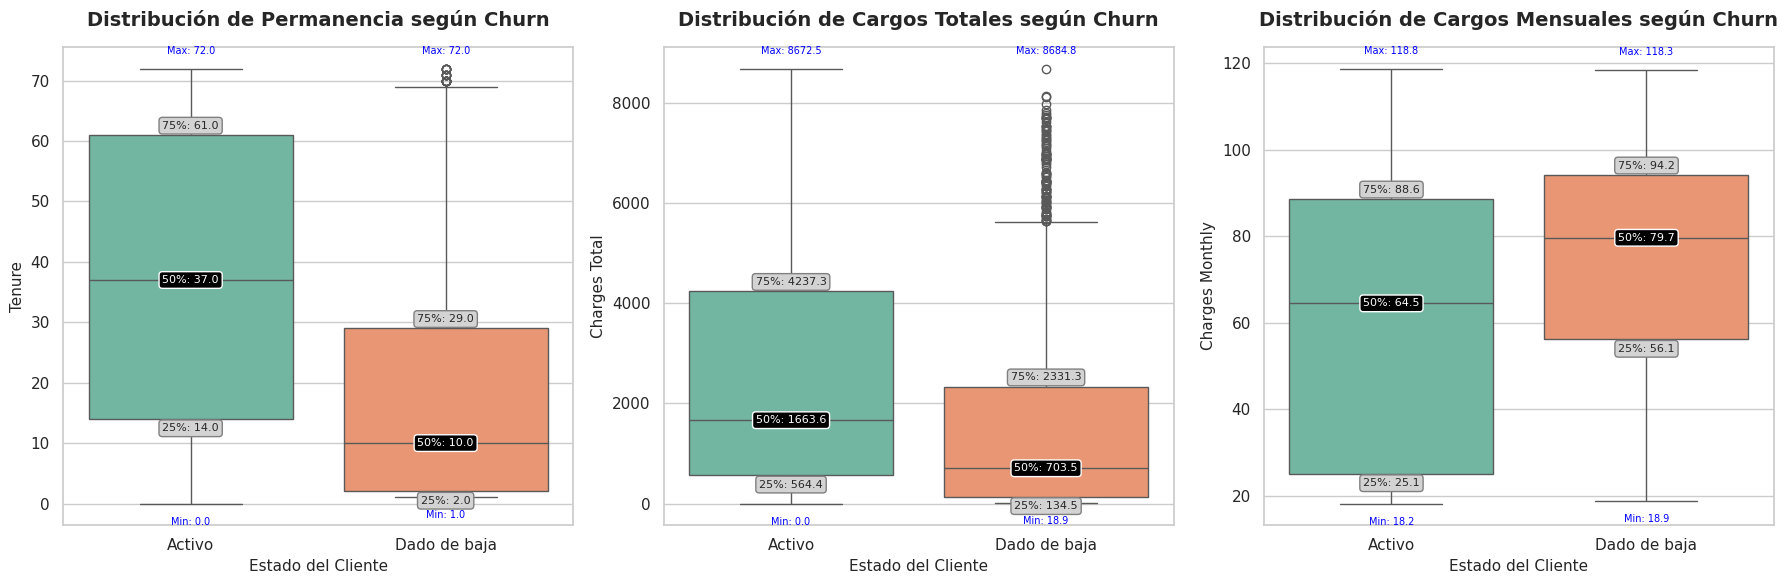

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar tipos correctos
df_expanded['tenure'] = df_expanded['tenure'].astype(int)
df_expanded['Charges.Total'] = df_expanded['Charges.Total'].astype(float)
df_expanded['Charges.Monthly'] = df_expanded['Charges.Monthly'].astype(float)

numeric_vars = ['tenure', 'Charges.Total', 'Charges.Monthly']
df_expanded[numeric_vars] = df_expanded[numeric_vars].apply(pd.to_numeric, errors='coerce')
df_expanded['Churn_Label'] = df_expanded['Churn'].map({0: 'Activo', 1: 'Dado de baja'})

# Títulos
titles = {
    'tenure': 'Distribución de Permanencia según Churn',
    'Charges.Total': 'Distribución de Cargos Totales según Churn',
    'Charges.Monthly': 'Distribución de Cargos Mensuales según Churn'
}

# Paleta personalizada
custom_palette = {"Activo": "#66c2a5", "Dado de baja": "#fc8d62"}

# Estilo general
sns.set(style="whitegrid")

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, var in enumerate(numeric_vars):
    ax = axes[idx]

    # Usar hue igual a x para evitar warning
    sns.boxplot(x='Churn_Label', y=var, hue='Churn_Label', data=df_expanded, ax=ax,
                palette=custom_palette, dodge=False)

    # Eliminar la leyenda solo si existe
    legend = ax.get_legend()
    if legend:
        legend.remove()

    # Títulos y etiquetas
    ax.set_title(titles[var], fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Estado del Cliente', fontsize=11)
    ax.set_ylabel(var.replace('.', ' ').title(), fontsize=11)

    # Estadísticas para anotaciones
    stats = df_expanded.groupby('Churn_Label')[var].describe()

    for i, label in enumerate(stats.index):
        q1 = stats.loc[label, '25%']
        median = stats.loc[label, '50%']
        q3 = stats.loc[label, '75%']
        min_val = stats.loc[label, 'min']
        max_val = stats.loc[label, 'max']
        rango = max_val - min_val
        offset = 0.01 * rango  # más cerca del boxplot

        # Agregar anotaciones
        ax.text(i, q1 - offset, f'25%: {q1:.1f}', ha='center', va='top',
                fontsize=8, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))
        ax.text(i, median, f'50%: {median:.1f}', ha='center', va='center',
                fontsize=8, color='white', bbox=dict(facecolor='black', boxstyle='round,pad=0.3'))
        ax.text(i, q3 + offset, f'75%: {q3:.1f}', ha='center', va='bottom',
                fontsize=8, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.3'))
        ax.text(i, min_val - 0.03 * rango, f'Min: {min_val:.1f}', ha='center', va='top',
                fontsize=7, color='blue')
        ax.text(i, max_val + 0.03 * rango, f'Max: {max_val:.1f}', ha='center', va='bottom',
                fontsize=7, color='blue')

plt.tight_layout()
plt.savefig('boxplots_final_sin_warning.png', transparent=False)
plt.show()


# **Informe Final**

## Introducción
Este análisis busca entender por qué algunos clientes cancelan el servicio (Churn) y cómo anticiparlo.

## Limpieza y Tratamiento de Datos
Se limpiaron columnas, se transformaron valores categóricos a numéricos, se creó la columna `Cuentas_Diarias`, y se manejaron valores nulos en `Charges.Total`.

## Análisis Exploratorio de Datos
Se realizaron análisis descriptivos y gráficos para entender el comportamiento de los clientes y su relación con la evasión.

## Conclusiones e Insights
- Mayor churn en contratos mensuales y clientes con menos tiempo (`tenure`).
- Los clientes que se dan de baja tienden a hacerlo en los primeros meses. Retenerlos en la etapa inicial es clave.
- Los clientes que permanecen generan más ingresos totales. La pérdida de un cliente temprano es una pérdida directa de ingresos.
- Clientes con cargos mensuales más altos tienen mayor churn.Los clientes que pagan más al mes tienen mayor riesgo de abandono. Quizás están insatisfechos con el valor recibido por ese precio.
- Ciertas formas de pago también muestran tendencias.

## Recomendaciones
- Implementar programas de retención temprana (primeros 6-12 meses).

- Mejorar fidelización de clientes nuevos.

- Ofrecer incentivos o descuentos a clientes con cargos mensuales altos.

- Medir la satisfacción temprana (NPS, encuestas) para intervenir a tiempo.

- Evaluar si los planes más caros están justificando su precio.

- Ofrecer incentivos y promociones para contratos más largos.



**Victoria Godoy Uribe - Analista de datos Junior**